In [1]:
import matplotlib.pyplot as plt
import math
import random

In [18]:
# モデルのパラメータ
b0 = 1*10**(-7)
b1 = 2*b0
c = 1.3*10
B = 1
gamma=200
a0=0.01
a1=1.75*a0

# 初期値
x = 1*10**8

# 目安
z2=(c/x - b0) / (b1 - b0)
y2 =( ((1-z2)/z2) *B*(1+gamma*z2**2) - a0)/a1

print(y2, z2)

2532.7619047619046 0.30000000000000004


In [19]:
z0 = (c - b0*x)/((b1-b0)*x)
sigma = B*gamma/((b1-b0)*x)
lamda = a0/(B*gamma)*2500
ky = a1/(B*gamma)

print(z0, gamma, sigma, lamda)

0.3 200 20.0 0.125


In [20]:
# 初期値
# x = 1*10**8
y = 2500*ky*random.random()
z = random.random()
t = 0.0

# 時間の設定
dt = 0.01
tEnd = 100
iEnd = int(tEnd/dt)

t_list = [t]
y_list = [y]
z_list = [z]

for i in range(1, iEnd):
    t = dt*i
    y_new = y + dt*(z-z0)*y
    z_new = z + dt*sigma*z*(((1- z )/z)*(z*z+1/gamma) - lamda - y)
    y = y_new
    z = z_new

    t_list.append(t)
    y_list.append(y)
    z_list.append(z)

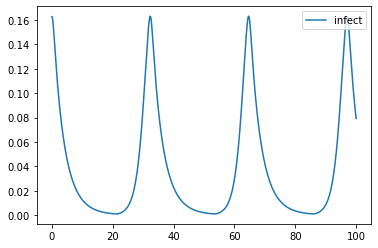

In [21]:
# 時間発展のプロット
plt.plot(t_list, y_list)
plt.legend(["infect"],loc="upper right")

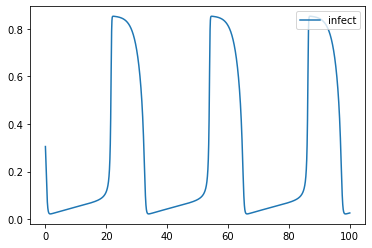

In [22]:
# 時間発展のプロット
plt.plot(t_list, z_list)
plt.legend(["infect"],loc="upper right")

In [23]:
# z0
z01 = 0
z02 = 1
dz0 = 0.001
length = int((z02-z01)/dz0)

z0_list=[]
miny_list=[]
maxy_list=[]
minz_list=[]
maxz_list=[]

for k in range(1,length):
    y3_list = []
    z3_list = []
    z0 = z01+dz0*k
    # epsilon = 100
    t=0
    y3 = 2500*ky*random.random()
    z3 =  random.random()
    z0_list.append(z0)
    for l in range(0, iEnd):
        t = dt*l
        y3_new = y3 + dt*(z3-z0)*y3
        z3_new = z3 + dt*sigma*z3*(((1- z3 )/z3)*(z3*z3+1/gamma) - lamda - y3)
        y3 = y3_new
        z3 = z3_new

        if t>50:
            y3_list.append(y3)
            z3_list.append(z3)

    y3_min=min(y3_list)
    y3_max=max(y3_list)
    z3_min=min(z3_list)
    z3_max=max(z3_list)

    miny_list.append(y3_min)
    maxy_list.append(y3_max)
    minz_list.append(z3_min)
    maxz_list.append(z3_max)

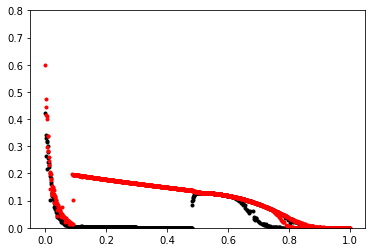

In [28]:
plt.plot(z0_list, miny_list,'.',color='black')
plt.plot(z0_list, maxy_list,'.',color='red')
plt.ylim(0, 0.8)
plt.savefig("fig5b_1.png", format="png", dpi=300)

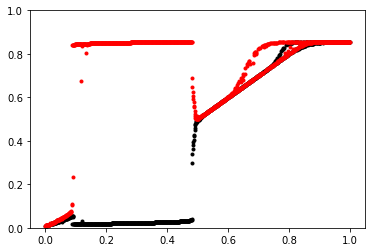

In [30]:
plt.plot(z0_list, minz_list,'.',color='black')
plt.plot(z0_list, maxz_list,'.',color='red')
plt.ylim(0,1)
plt.savefig("fig5b_2.png", format="png", dpi=300)